<a href="https://colab.research.google.com/github/chitinglow/data-analysis/blob/main/Bike_sharing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#load data
hourly_data = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter01/data/hour.csv')
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data: {hourly_data.isnull().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data: instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [3]:
## Descriptive statistis for the numerical data
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [4]:
## Data preprocessing
preprocessed_data = hourly_data.copy()

#transform season data
seasons_mapping = {1:'winter', 2:'spring', 3:'summer', 4:'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x :seasons_mapping[x])

In [5]:
## Tranform year column
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x :yr_mapping[x])

In [6]:
## Tranform weekday column
weekday_mapping = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x : weekday_mapping[x])

In [7]:
## Transform weathersit data
weather_mapping = {1:'clear', 2:'cloudy', 3:'light_rain_snow', 4:'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x : weather_mapping[x])

In [8]:
# rescale data
preprocessed_data['hum'] = preprocessed_data['hum'] * 100
preprocessed_data['windspeed'] = preprocessed_data['windspeed'] * 67
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,clear,0.24,0.2879,81.0,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,0,1,1


In [9]:
## sample data
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


In [10]:
# assert that total numer of rides is equal to the sum of registered and casual ones
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), \
'Sum of casual and registered rides not equal to total number of rides'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rides distributions')

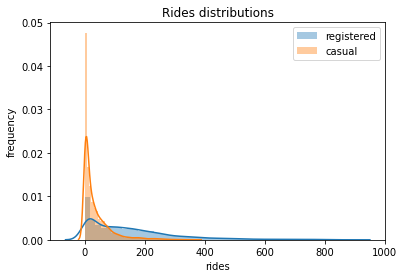

In [11]:
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.ylabel("frequency")
plt.title("Rides distributions")

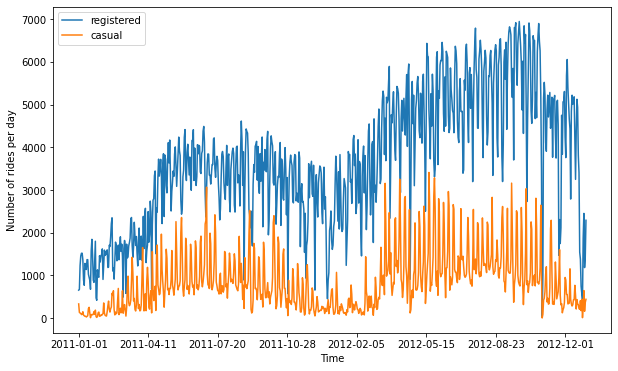

In [12]:
# Plot over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("Time")
ax.set_ylabel('Number of rides per day')
plt.show()

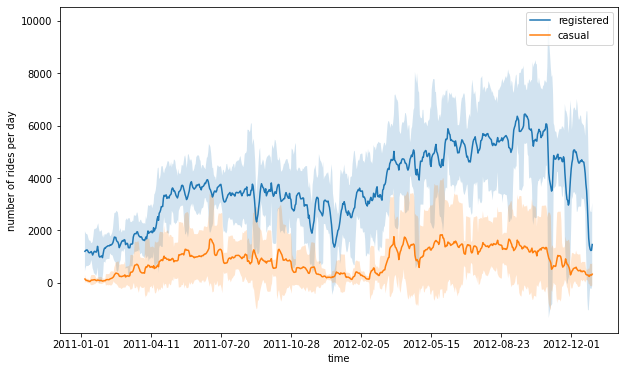

In [13]:

# create new dataframe with necessary for plotting columns, and 
# obtain number of rides per day, by grouping over each day
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()

# define window for computing the rolling mean and standard deviation
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

# create a plot of the series, where we first plot the series of rolling means, 
# then we color the zone between the series of rolling means 
# +- 2 rolling standard deviations
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index,
                rolling_means['registered'] + 2*rolling_deviations['registered'],
                rolling_means['registered'] - 2*rolling_deviations['registered'],
                alpha = 0.2)
ax.fill_between(rolling_means.index,
                rolling_means['casual'] + 2*rolling_deviations['casual'],
                rolling_means['casual'] - 2*rolling_deviations['casual'],
                alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


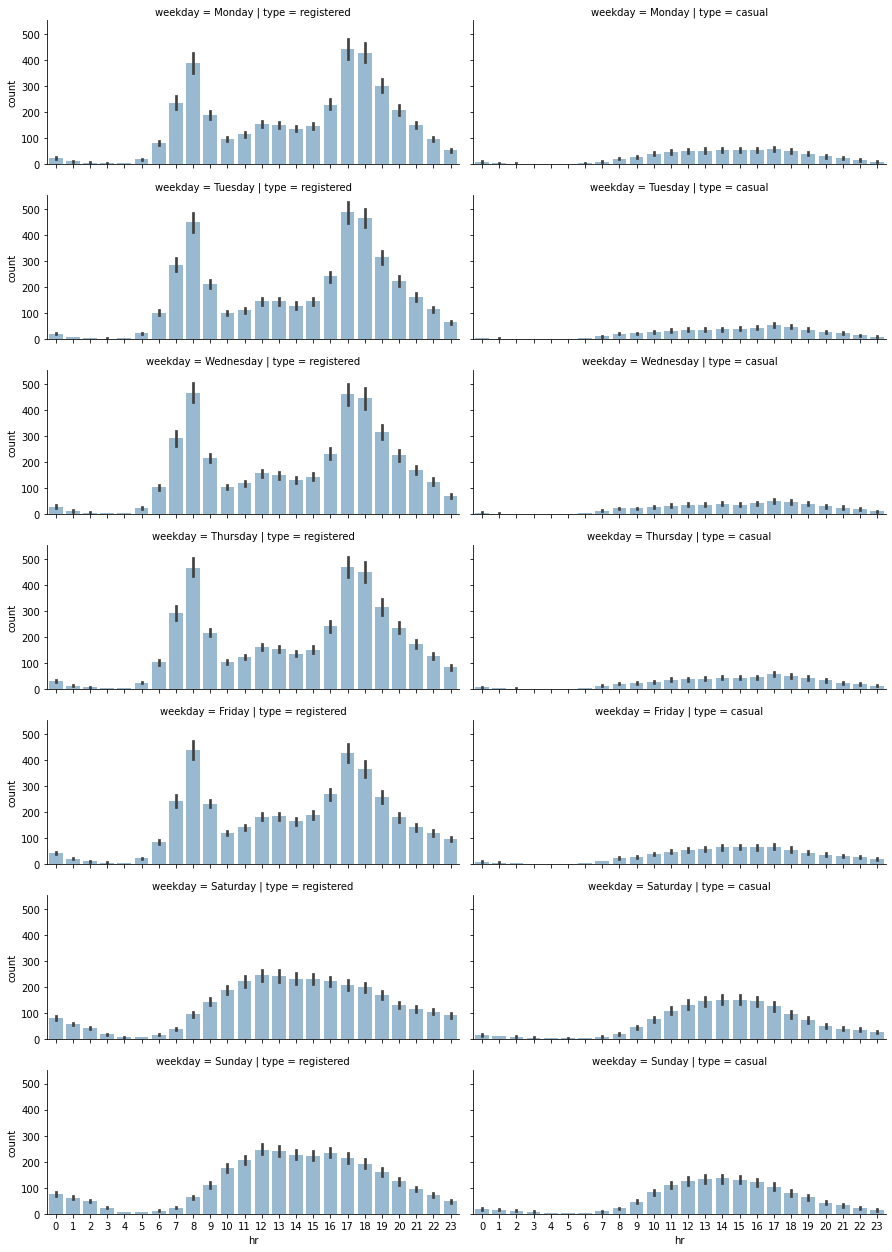

In [14]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]

# transform the data into a format, in number of entries are computed as count,
# for each distinct hr, weekday and type (registered or casual)
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')

# create FacetGrid object, in which a grid plot is produced. 
# As columns, we have the various days of the week,
# as rows, the different types (registered and casual)
grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5,
                     aspect=2.5, row_order=['Monday', 'Tuesday',
                                            'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


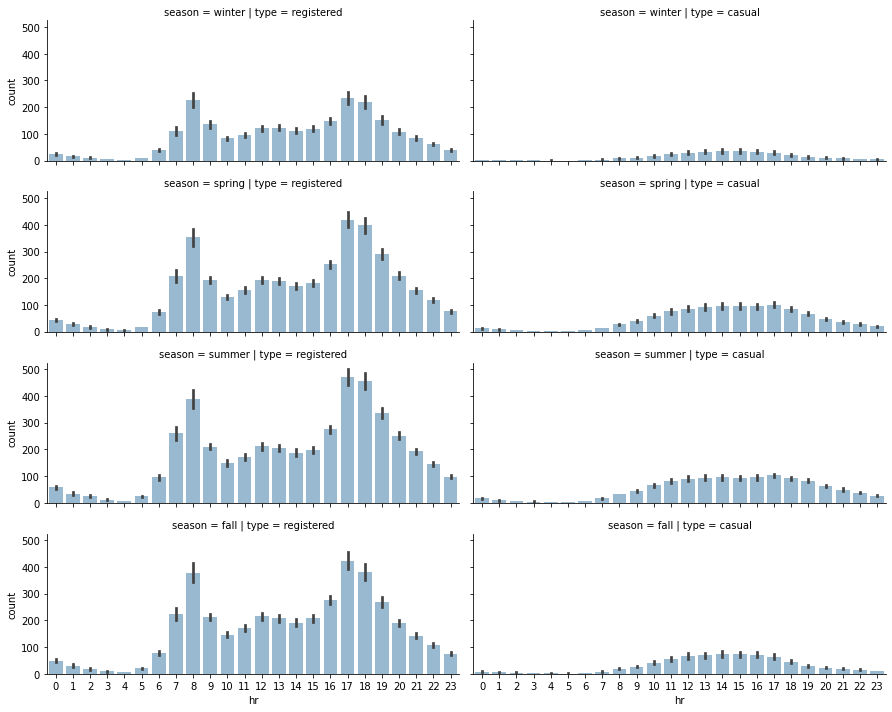

In [15]:
## Seasonal impact
plot_data = preprocessed_data[['hr', 'season', 'registered', 'casual']]

# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name='type', \
                           value_name='count')

# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', \
                     col='type', height=2.5, aspect=2.5, \
                     row_order=['winter', 'spring', 'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
plt.show()

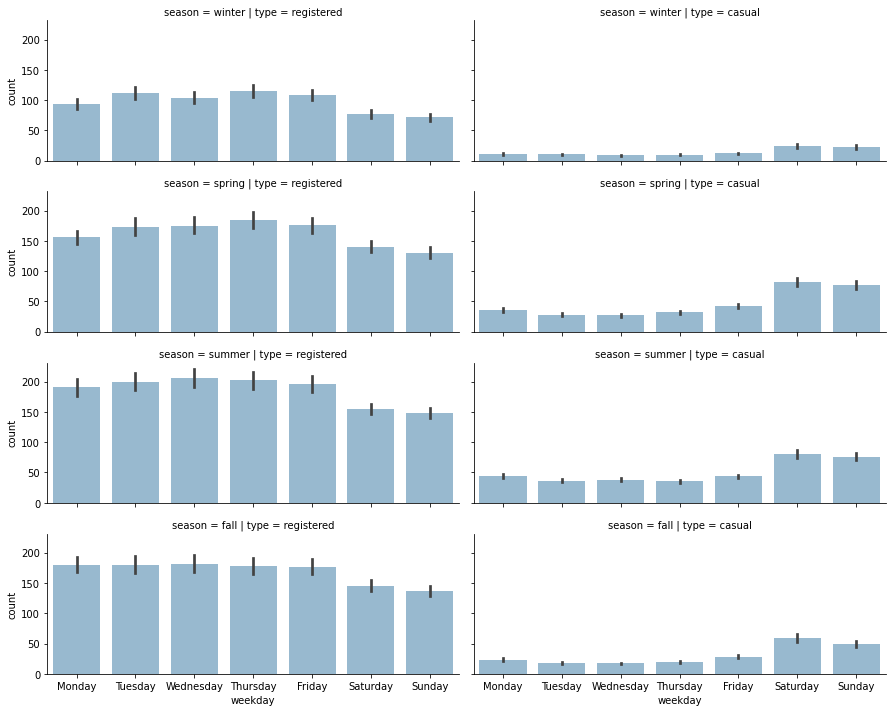

In [16]:
## Weekday 
plot_data = preprocessed_data[['weekday', 'season', 'registered', 'casual']]
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5, 
                     row_order=['winter', 'spring', 'summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, 
         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [17]:
## Hypothesis testing
population_mean = preprocessed_data.registered.mean()

## get sample of data in 2011
sample = preprocessed_data[(preprocessed_data.season == "summer") & (preprocessed_data.yr == 2011)].registered

In [18]:
## Performaing t-test and get p-value
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]}, p-value: {test_result[1]}")

Test statistic: -3.491969148378619, p-value: 0.0004887645279519517


In [19]:
import random
random.seed(111)

sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)
print(f"Test statistic: {test_result_unbiased[0]}, p-value: {test_result_unbiased[1]}")

Test statistic: -1.422589803608666, p-value: 0.15521436791607118


In [20]:
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)

# select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: -16.004, p-value: 0.000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


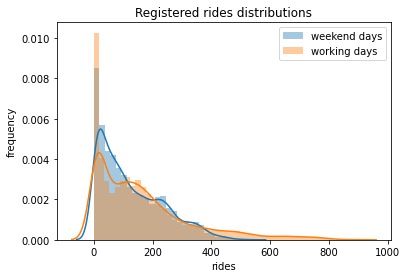

In [21]:
# plot distributions of registered rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")
plt.show()

In [22]:
# select casual rides for the weekend and working days
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]

# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: 41.077, p-value: 0.000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


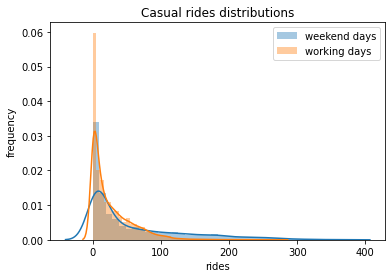

In [23]:
# plot distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")
plt.show()

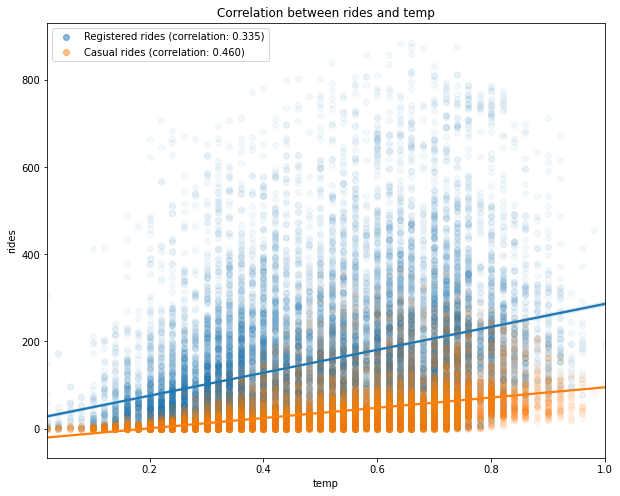

In [24]:
def plot_correlations(data, col):
    # get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, scatter_kws={"alpha":0.05}, 
                     label=f"Registered rides (correlation: {corr_r:.3f})")
    
    # get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, scatter_kws={"alpha":0.05}, 
                    label=f"Casual rides (correlation: {corr_c:.3f})")
    
    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles: 
        lh.set_alpha(0.5)
        
    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {col}")
    return ax
  
  
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')
plt.show()

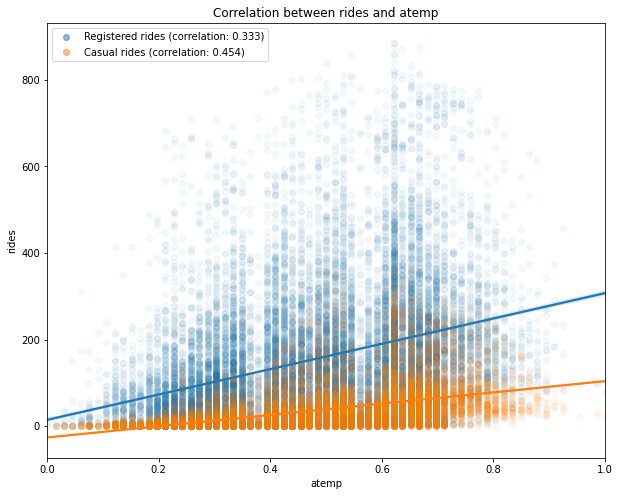

In [25]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')
plt.show()

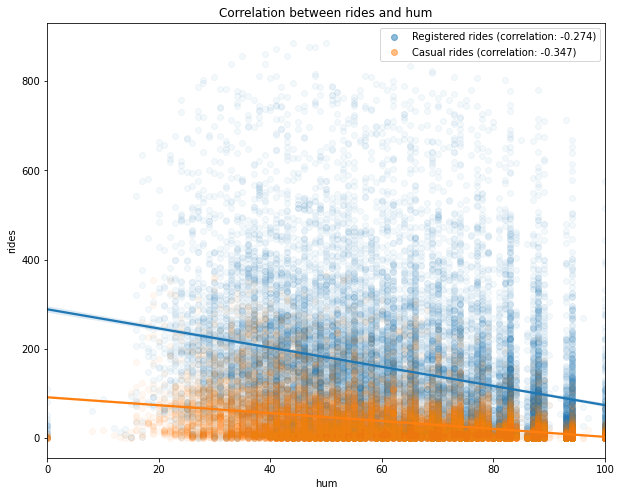

In [26]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')
plt.show()

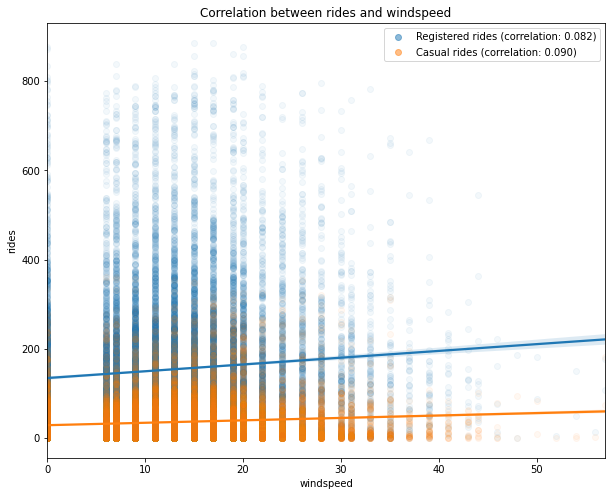

In [27]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')
plt.show()

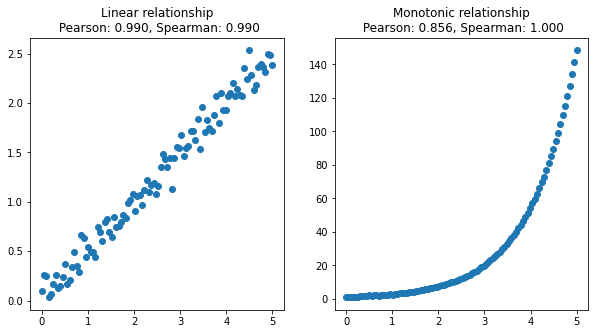

In [28]:
from scipy.stats import pearsonr, spearmanr

# define random variables
x = np.linspace(0,5, 100)
y_lin = 0.5*x + 0.1*np.random.randn(100)
y_mon = np.exp(x) + 0.1*np.random.randn(100)

# compute correlations
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

# visualize variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(x, y_lin)
ax1.set_title(f"Linear relationship\n Pearson: {corr_lin_pearson:.3f}, Spearman: {corr_lin_spearman:.3f}")
ax2.scatter(x, y_mon)
ax2.set_title(f"Monotonic relationship\n Pearson: {corr_mon_pearson:.3f}, Spearman: {corr_mon_spearman:.3f}")
plt.show()

In [29]:
# define function for computing correlations
def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]

    return pd.Series({"Pearson (registered)": pearson_reg, 
                      "Spearman (registered)": spearman_reg,
                      "Pearson (casual)": pearson_cas, 
                      "Spearman (casual)": spearman_cas})

# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", "Spearman (registered)", "Pearson (casual)", "Spearman (casual)"])

for col in cols:
    corr_data[col] =  compute_correlations(preprocessed_data, col)
    
corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


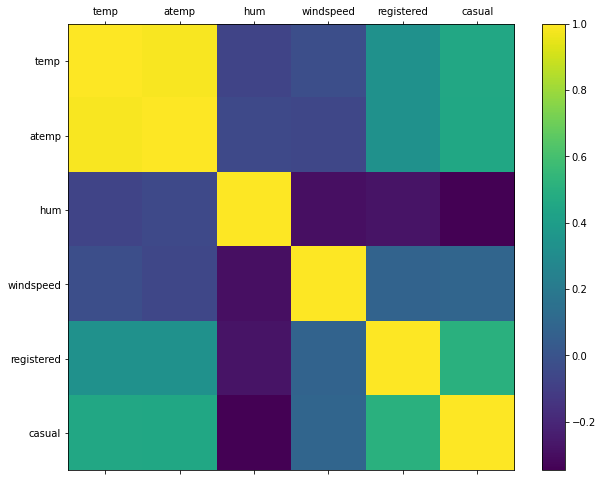

In [30]:
# plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", "registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()

fig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])
plt.show()

In [31]:
## Time series analysis
# get daily rides
daily_rides = preprocessed_data[["dteday", "registered", "casual"]]
daily_rides = daily_rides.groupby("dteday").sum()

# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

<Figure size 432x288 with 0 Axes>

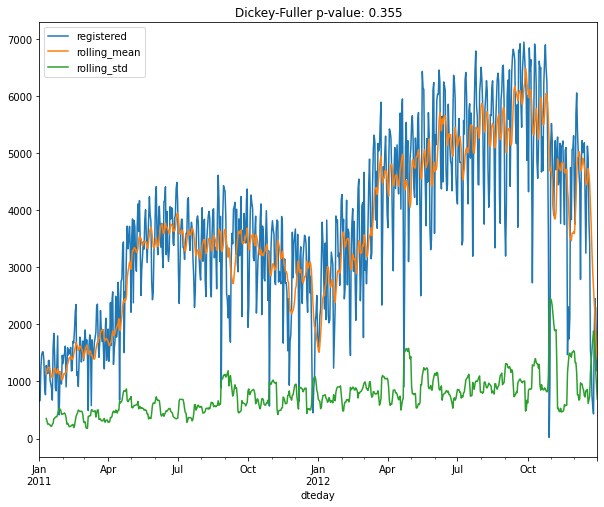

In [32]:
# define function for plotting rolling statistics and ADF test for time series
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts, window=10, **kwargs):
    # create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    plot_data['rolling_std'] = ts.rolling(window).std()

    # compute p-value of Dickey-Fuller test
    p_val = adfuller(ts)[1]

    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")

plt.figure()
test_stationarity(daily_rides["registered"], figsize=(10, 8))
plt.show()

<Figure size 432x288 with 0 Axes>

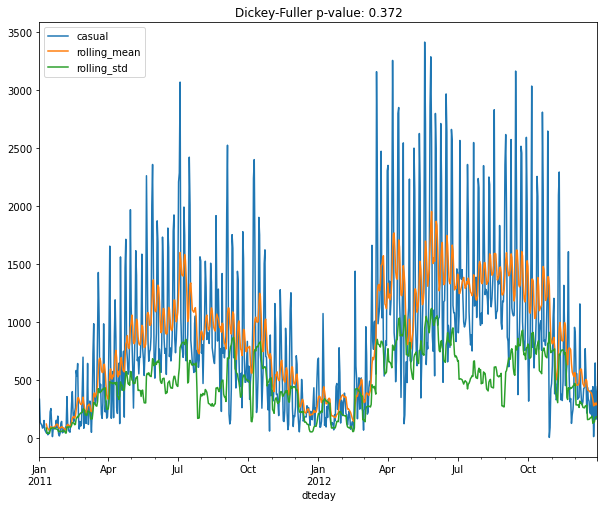

In [33]:
plt.figure()
test_stationarity(daily_rides["casual"], figsize=(10, 8))
plt.show()

<Figure size 432x288 with 0 Axes>

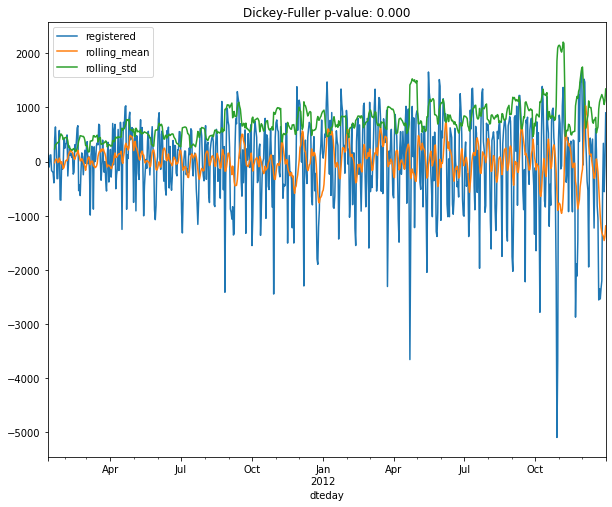

In [34]:
# make time series stationary
registered = daily_rides["registered"]
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)
plt.figure()
test_stationarity(registered_ma_diff, figsize=(10, 8))

<Figure size 432x288 with 0 Axes>

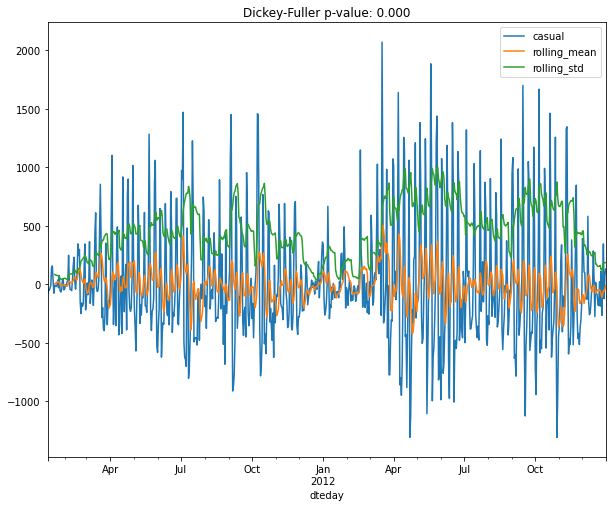

In [35]:
plt.figure()
test_stationarity(casual_ma_diff, figsize=(10, 8))

<Figure size 432x288 with 0 Axes>

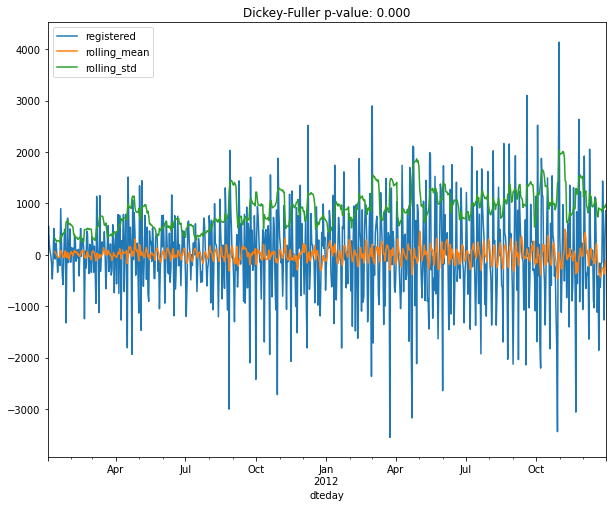

In [36]:
# subtract last value
registered = daily_rides["registered"]
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)

plt.figure()
test_stationarity(registered_diff, figsize=(10, 8))

<Figure size 432x288 with 0 Axes>

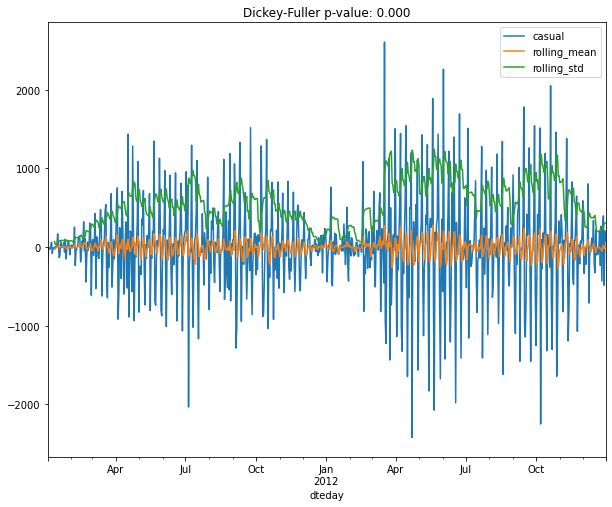

In [37]:
plt.figure()
test_stationarity(casual_diff, figsize=(10, 8))

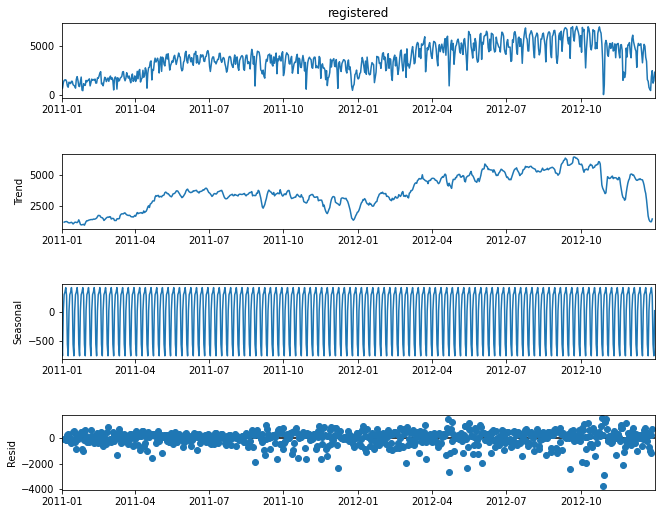

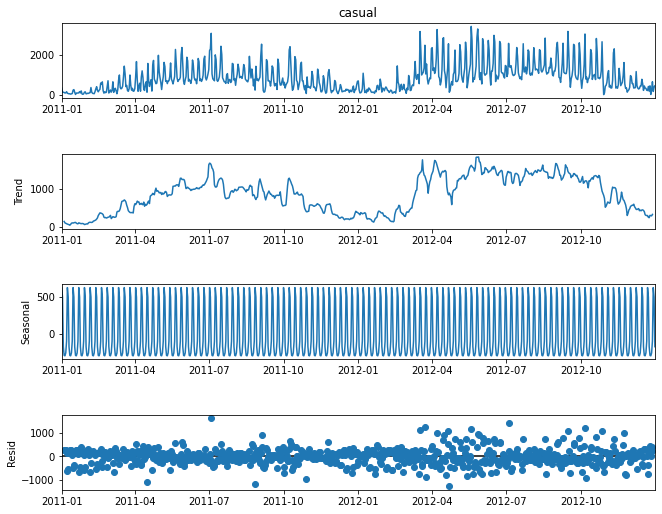

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

registered_decomposition = seasonal_decompose(daily_rides["registered"])
casual_decomposition = seasonal_decompose(daily_rides["casual"])
# plot decompositions
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10, 8)

casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10, 8)

<Figure size 432x288 with 0 Axes>

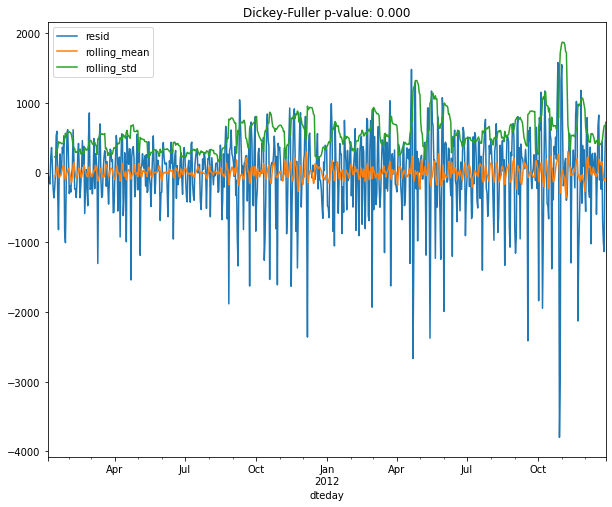

In [39]:
# test residuals for stationarity
plt.figure()
test_stationarity(registered_decomposition.resid.dropna(), figsize=(10, 8))

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


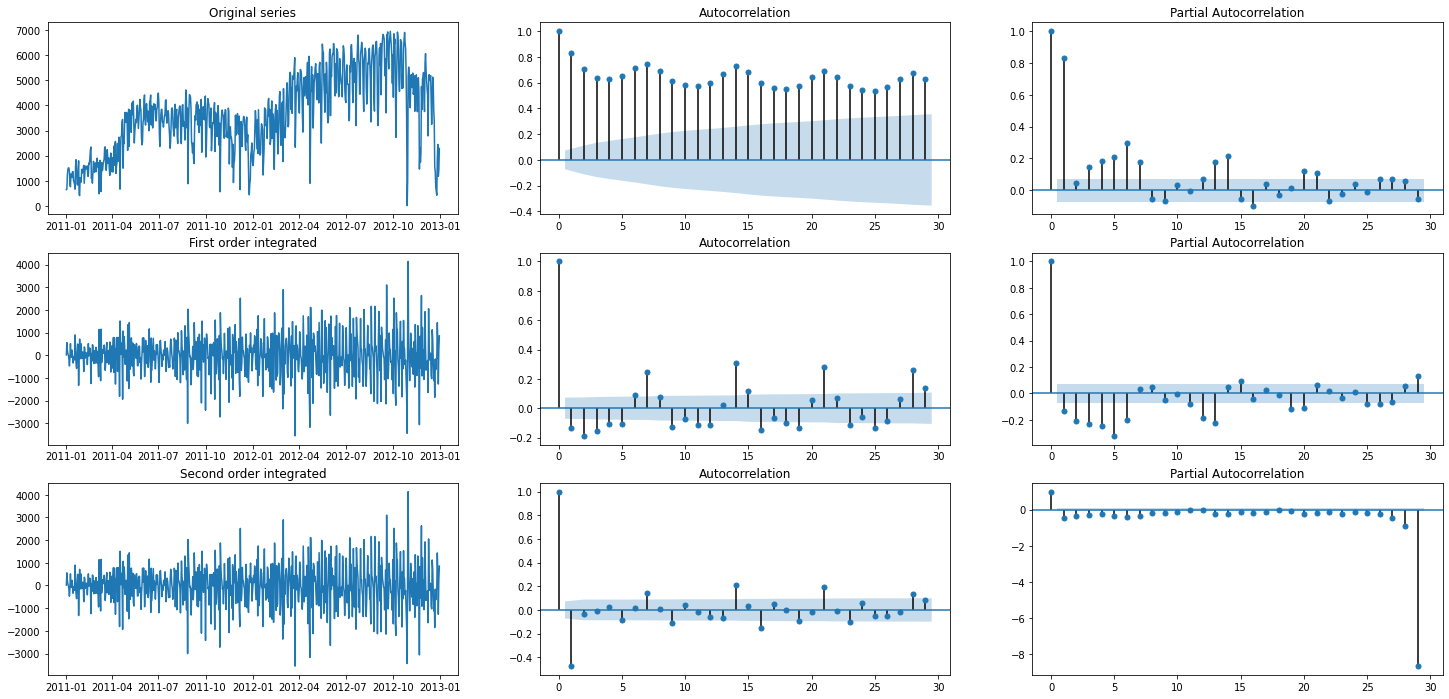

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(3, 3, figsize=(25, 12))

# plot original series
original = daily_rides["registered"]
axes[0,0].plot(original)
axes[0,0].set_title("Original series");
plot_acf(original, ax=axes[0,1])
plot_pacf(original, ax=axes[0,2])

# plot first order integrated series
first_order_int = original.diff().dropna()
axes[1,0].plot(first_order_int)
axes[1,0].set_title("First order integrated")
plot_acf(first_order_int, ax=axes[1,1])
plot_pacf(first_order_int, ax=axes[1,2])

# plot first order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2,0].plot(first_order_int)
axes[2,0].set_title("Second order integrated");
plot_acf(second_order_int, ax=axes[2,1])
plot_pacf(second_order_int, ax=axes[2,2])
plt.show()

In [41]:
# fit an ARIMA model to the registered rides
from pmdarima import auto_arima

model = auto_arima(registered, start_p=1, start_q=1, max_p=3, max_q=3, information_criterion="aic")
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -5854.516
Date:                Sun, 04 Apr 2021   AIC                          11723.032
Time:                        12:24:37   BIC                          11755.184
Sample:                             0   HQIC                         11735.437
                                - 731                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6064      0.050     32.308      0.000       1.509       1.704
ar.L2         -1.4460      0.062    -23.283      0.000      -1.568      -1.324
ar.L3          0.3597      0.049      7.354      0.0

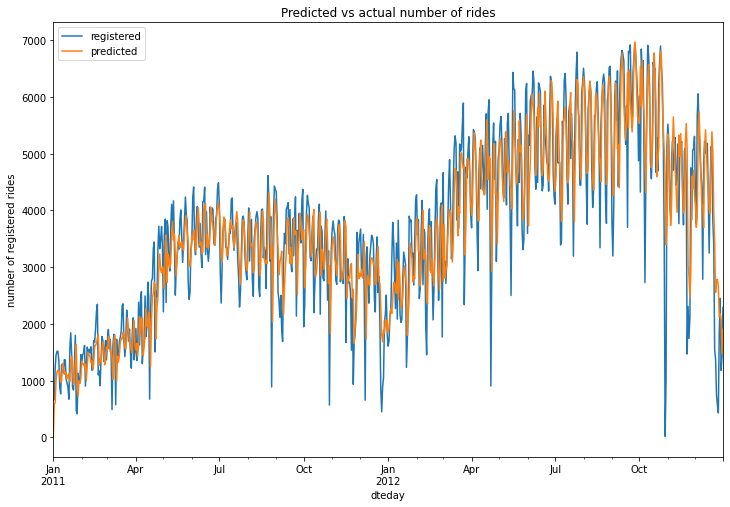

In [43]:
# plot original and predicted values
plot_data = pd.DataFrame(registered)
plot_data['predicted'] = model.predict_in_sample()
plot_data.plot(figsize=(12, 8))
plt.ylabel("number of registered rides")
plt.title("Predicted vs actual number of rides")
plt.show()

In [44]:
# load hourly data
data = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter01/data/hour.csv')

# create new column by encoding the weathersit one
weather_mapping = {1: 'clear', 2: 'cloudy',
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}
data['weather'] = data['weathersit'].apply(lambda x: weather_mapping[x])

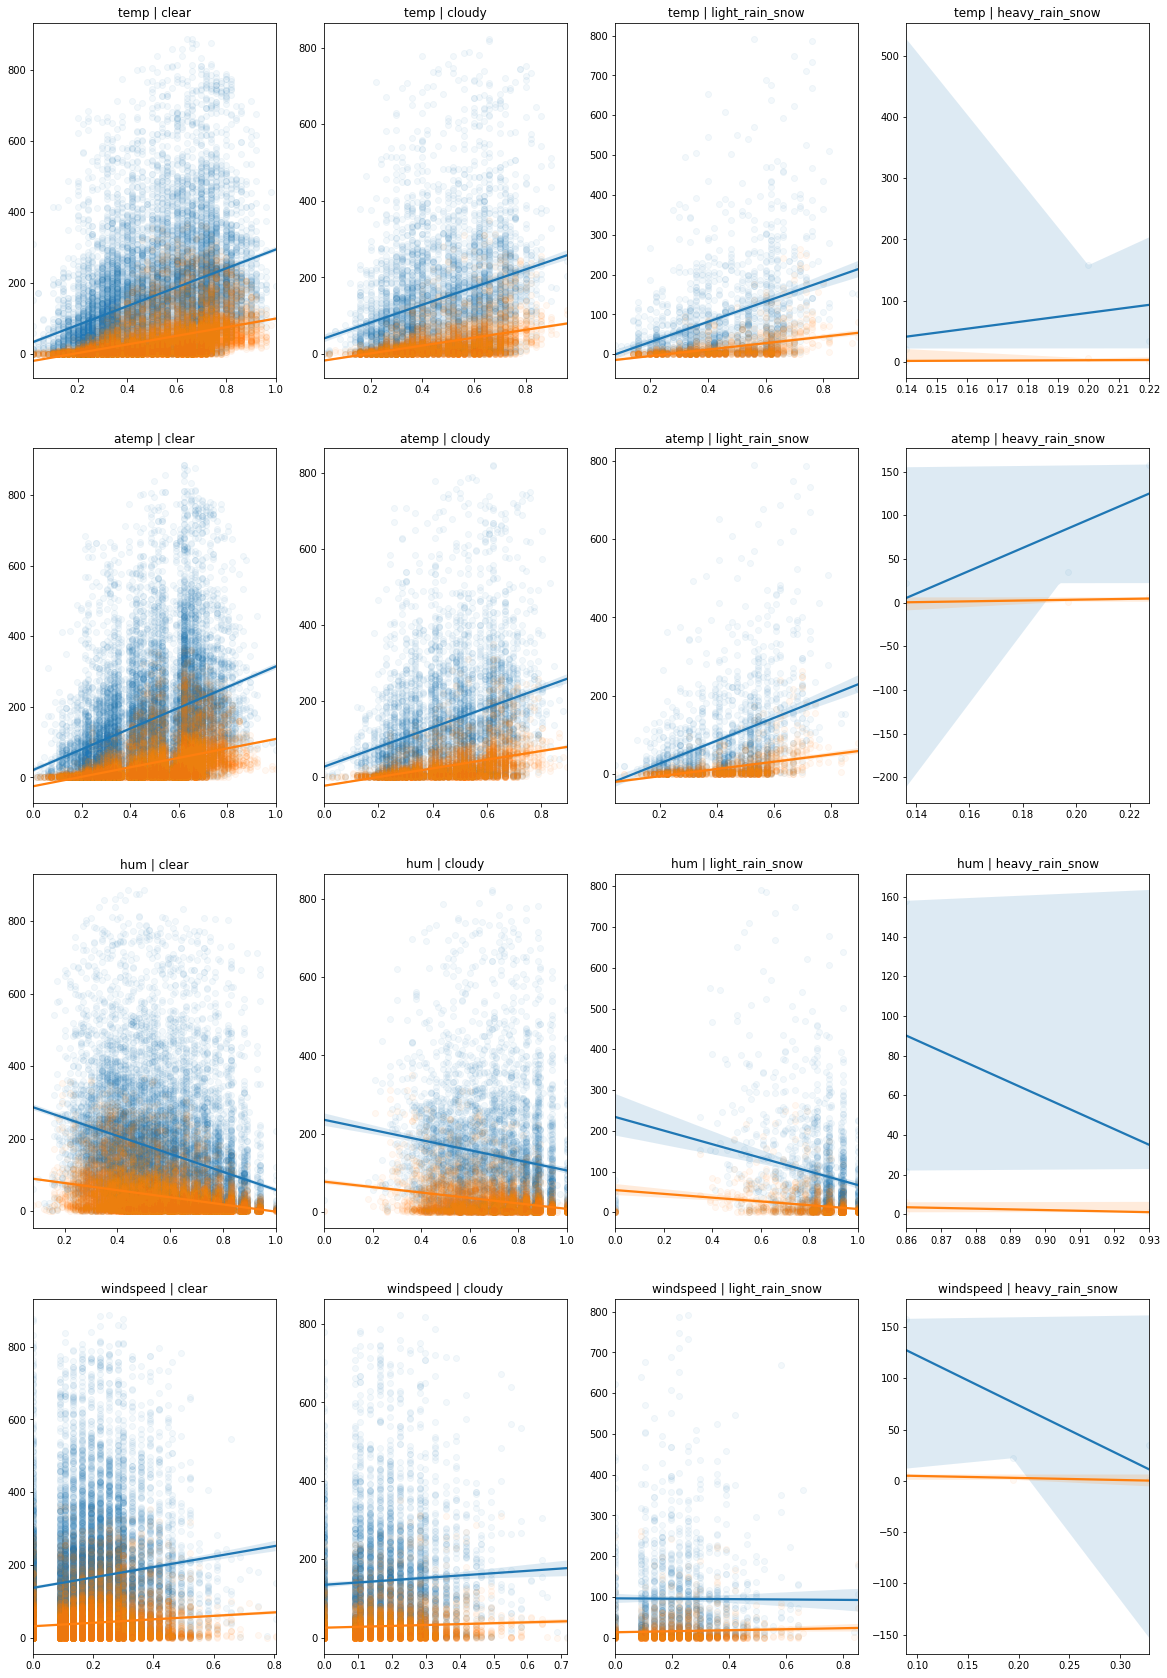

In [45]:
# define a function for creating a regression plot for a specified weather condition
def create_regression_plot(data, col, weather_cond):
    # extract data for the specific weather condition
    plot_data = data[data['weather'] == weather_cond]

    # create regplot for registered users
    ax = sns.regplot(x=col, y="registered", data=plot_data, \
                     scatter_kws={"alpha":0.05})
    
    # create regplot for casual users
    ax = sns.regplot(x=col, y="casual", data=plot_data, \
                     scatter_kws={"alpha":0.05})
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"{col} | {weather_cond}")
    return ax

# create 4 by 4 regplots with columns and weather conditions
weather_conditions = data.weather.unique()
columns = ["temp", "atemp", "hum", "windspeed"]

plt.figure(figsize=(20,30))
for col_index, col in enumerate(columns):
    for row_index, weather_cond in enumerate(weather_conditions):
        plot_number = row_index + col_index*4 + 1
        plt.subplot(4,4,plot_number)
        create_regression_plot(data, col, weather_cond)  

In [46]:
# create function for computing pearson correlation
def print_correlations(data, col, weather_cond):
    # extract data for the specific weather condition
    corr_data = data[data['weather'] == weather_cond]
    
    # compute pearson correlation between col and registered rides
    pearson_corr_r = pearsonr(corr_data[col], corr_data["registered"])
    
    # compute pearson correlation between col and registered rides
    pearson_corr_c = pearsonr(corr_data[col], corr_data["casual"])
    
    # print correlations
    print(f"Pearson correlation (registered, {col}): corr={pearson_corr_r[0]:.03f}, pval={pearson_corr_r[1]:.03f}")
    print(f"Pearson correlation (casual, {col}): corr={pearson_corr_c[0]:.03f}, pval={pearson_corr_c[1]:.03f}")

In [47]:
# print correlations for temp, atemp, hum and windspeed columns 
# with registered and casual rides
weather_conditions = data.weather.unique()
columns = ["temp", "atemp", "hum", "windspeed"]

for col in columns:
    for weather_cond in weather_conditions:
        print_correlations(data, col, weather_cond)

Pearson correlation (registered, temp): corr=0.340, pval=0.000
Pearson correlation (casual, temp): corr=0.459, pval=0.000
Pearson correlation (registered, temp): corr=0.285, pval=0.000
Pearson correlation (casual, temp): corr=0.437, pval=0.000
Pearson correlation (registered, temp): corr=0.356, pval=0.000
Pearson correlation (casual, temp): corr=0.433, pval=0.000
Pearson correlation (registered, temp): corr=0.360, pval=0.766
Pearson correlation (casual, temp): corr=0.277, pval=0.821
Pearson correlation (registered, atemp): corr=0.334, pval=0.000
Pearson correlation (casual, atemp): corr=0.451, pval=0.000
Pearson correlation (registered, atemp): corr=0.285, pval=0.000
Pearson correlation (casual, atemp): corr=0.434, pval=0.000
Pearson correlation (registered, atemp): corr=0.366, pval=0.000
Pearson correlation (casual, atemp): corr=0.445, pval=0.000
Pearson correlation (registered, atemp): corr=0.810, pval=0.399
Pearson correlation (casual, atemp): corr=0.756, pval=0.454
Pearson correlat